# Statistics - Transactions Analysis in a Retail Chain


You are hired by some retail company to analyse transaction statistics in a retail chain.

### Data

There are three datasets: `customers.csv`, `purchases.csv` and `shops.csv`. They are stored in `data` folder.

`customers.csv` contains information about each customer registered in loyalty program.

`shops.csv` contains information about shops and special offers they organized. One shap can organize several offers and therefore there are usually several rows that correspond to the same shops. However, some shops do not organize special offers at all, but they are presented in this table nevertheless.

`purchases.csv` is a purchase log. It contains information for all customers, either registered in a loyalty program (in this case we know the corresponding customer id) or not registered. One purchase can be a collection of several items, but we see only the total price of everything bought.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [36]:
customers = pd.read_csv('https://github.com/mbburova/MDS/raw/main/customers.csv', sep = ',')
purchases = pd.read_csv('https://github.com/mbburova/MDS/raw/main/purchases.csv', sep = ',')
shops = pd.read_csv('https://github.com/mbburova/MDS/raw/main/shops.csv')

1. What is the type of variable `customer_id` in the dataset `purchases`?
2. What is the type of variable `age` in the dataset `customers`?

In [39]:
purchases.head()

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038


In [37]:
purchases['customer_id'].dtype.name # categorical

'float64'

In [38]:
customers['age'].dtype.name # numerical

'float64'

Let us consider column `total_price` in the dataset `purchases`. May we assume that this column is an i.i.d. sample from some random variable?


In [41]:
purchases.head(20)

,customer_id,date,shop_id,total_price
0,0.0,2018-05-04,40,289.673291
1,0.0,2019-01-26,40,1316.898901
2,0.0,2018-11-18,42,159.414367
3,0.0,2018-05-12,42,808.791649
4,0.0,2019-04-20,42,1207.855038
5,0.0,2018-11-24,42,1057.752024
6,0.0,2018-07-28,15,896.895694
7,0.0,2019-06-01,40,341.922336
8,0.0,2019-03-13,42,69.240631
9,0.0,2018-12-22,40,936.012095


We can consider a sample as i.i.d. if:
* all items in the sample are taken with the same probability.
* all items are independent of each other:  knowledge of the value of one variable doesn't give any information about the value of the other variable.

Can we be sure that all the items are taken with the same probability? Probably no, as we have the same customers (with the same customer_id) come to the store several times. And if they buy something one day, the probability that he/she will come again the next day is lower than the probability that this customer will visit again in a month. So the probabilities are different and there can be some regularity in distribution.

Can we say that all the items are independent? We can not say it about all items. For example, some customers can come to the store together with a friend and would not come if their friend was not going to the store. So we can't really consider total_price for these customers independent, as there would possibly not be one purchase without the other. Moreover, each customer has his/her own preferences, so all purchases of the same customer will have their own distribution. And in our dataset the total price is given not only to the same customers several times, but also to the same stores which we can't consider identical between each other.

Therefore, we can't assume that the column total_price in the dataset purchases is an i.i.d. sample from some random variable.

Visualise distribution of variable `age` in the dataset `customers` using appropriate visualization tool.


(array([ 72., 119., 100., 117.,  92., 115.,  91.,  62.,  43.,  13.]),
 array([12. , 19.6, 27.2, 34.8, 42.4, 50. , 57.6, 65.2, 72.8, 80.4, 88. ]),
 <BarContainer object of 10 artists>)

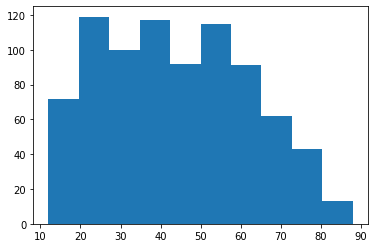

In [43]:
import matplotlib.pyplot as plt
plt.hist(customers['age'])

Your employer is going to provide two special offers for all registered customers based on the customer age. They want to pick some threshold age, and offer one special program to customers who are younger than this threshold age and another special program to customers who are older than this age. They want to choose the threshold in such a way that the number of potential participants of both programs coincide (or at least be as close to each other as possible). What is the threshold?

In [44]:
customers['age'].median()

43.0

Let us visualize how purchases are distributed around a year. For example, it is known that December is a hot month for retail due to Christmas. Will you see it in the data? Are there any other tendencies we will see?

In [45]:
purchases["date"] = pd.to_datetime(purchases["date"])

Let's check that `date` has correct `dtype`:

In [46]:
purchases["date"].dtype

dtype('<M8[ns]')

In [47]:
purchases["date"].dt.dayofweek

0        4
1        5
2        6
3        5
4        5
        ..
40397    5
40398    5
40399    2
40400    5
40401    5
Name: date, Length: 40402, dtype: int64

<AxesSubplot:xlabel='month'>

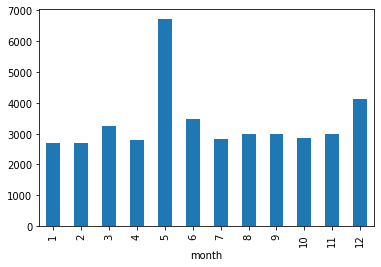

In [52]:
purchases["month"] = purchases["date"].dt.month
purchases.groupby("month")['total_price'].count().plot.bar()

What's wrong with May? Why do we have so many purchases? Are there any unknown holidays in this month? Or it's some other reason? Investigate your data and give an answer.

Let's check purchases made in May:

In [89]:
purchases[purchases['month'] == 5]

,customer_id,date,shop_id,total_price,month
0,0.0,2018-05-04,40,289.673291,5
3,0.0,2018-05-12,42,808.791649,5
42,2.0,2018-05-05,51,484.562929,5
43,2.0,2018-05-23,41,277.083807,5
48,2.0,2019-05-25,52,665.677759,5
...,...,...,...,...,...
40361,NaN,2018-05-03,47,53.580163,5
40363,NaN,2019-05-01,40,17.739825,5
40368,NaN,2018-05-19,12,110.528141,5
40374,NaN,2019-05-03,33,106.411080,5


In [90]:
purchases[purchases['month'] == 5]['date'].unique()

array(['2018-05-04T00:00:00.000000000', '2018-05-12T00:00:00.000000000',
       '2018-05-05T00:00:00.000000000', '2018-05-23T00:00:00.000000000',
       '2019-05-25T00:00:00.000000000', '2019-05-08T00:00:00.000000000',
       '2019-05-14T00:00:00.000000000', '2018-05-16T00:00:00.000000000',
       '2018-05-10T00:00:00.000000000', '2019-05-17T00:00:00.000000000',
       '2018-05-03T00:00:00.000000000', '2018-05-26T00:00:00.000000000',
       '2018-05-25T00:00:00.000000000', '2019-05-04T00:00:00.000000000',
       '2018-05-15T00:00:00.000000000', '2019-05-05T00:00:00.000000000',
       '2018-05-17T00:00:00.000000000', '2018-05-29T00:00:00.000000000',
       '2019-05-22T00:00:00.000000000', '2018-05-13T00:00:00.000000000',
       '2019-05-23T00:00:00.000000000', '2019-05-29T00:00:00.000000000',
       '2019-05-02T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-05-31T00:00:00.000000000', '2018-05-19T00:00:00.000000000',
       '2019-05-16T00:00:00.000000000', '2018-05-18

We can notice when we choose data for May, we get values for two months: May, 2018 and May, 2019.

Let's vizualize the purchases during all the given period:

<AxesSubplot:xlabel='year,month'>

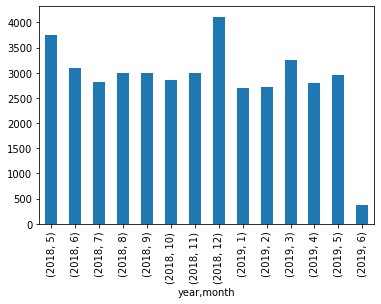

In [91]:
purchases['year'] = purchases['date'].dt.year
purchases.groupby(["year", "month"])['total_price'].count().plot.bar()

Now we can clearly see that the maximum number of purchases is in December, and not in May. The result we had for May was because it combines May, 2018 and May, 2019. 

We see that people go to shop more often in December. But do they spend more per each visit? Let us draw a bar plot that shows the average purchase total price per month of year.

<AxesSubplot:xlabel='month'>

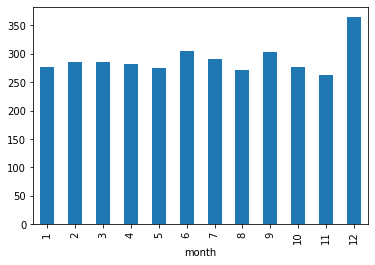

In [53]:
purchases.groupby("month")['total_price'].mean().plot.bar()

Okay, we see that there is a difference between December's mean purchase price and other month's. But we also see that the average price is different in different months (not including December), probably due to some random factors. Is it possible that December behaviour is just a result of fluke? To answer this question, let us compare two months, for example, December and November, in a statistically rigorous way.

In [54]:
purchases_pivot = purchases.pivot_table(values='total_price', index='shop_id', columns='month', aggfunc='mean')

In [55]:
november = purchases_pivot[11].to_list()
december = purchases_pivot[12].to_list()

In [56]:
from scipy.stats import ttest_rel
ttest_rel(december, november)

Ttest_relResult(statistic=12.130046456676514, pvalue=2.8875117936923646e-19)

Now let us investigate customer behaviour. First of all we are interested in the relation between customers' age and their spendings per each purchase.

In [57]:
purchases_c = pd.merge(purchases, 
                       customers, 
                       left_on='customer_id', 
                       right_on='customer id', 
                       how = 'inner',
                      ).drop('customer id', axis=1)

In [59]:
purchases_c

,customer_id,date,shop_id,total_price,month,age
0,0.0,2018-05-04,40,289.673291,5,38.0
1,0.0,2019-01-26,40,1316.898901,1,38.0
2,0.0,2018-11-18,42,159.414367,11,38.0
3,0.0,2018-05-12,42,808.791649,5,38.0
4,0.0,2019-04-20,42,1207.855038,4,38.0
...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,24.0
28795,1212.0,2018-07-20,60,50.592132,7,24.0
28796,1212.0,2019-04-18,15,95.459705,4,24.0
28797,1212.0,2019-02-14,60,69.968788,2,24.0


To visualize the relation between customer's age and their spendings, we have to transform our table in such a way that one observation (row) corresponds to one customer.


In [66]:
purchases_c_mean = purchases_c.groupby('customer_id')[['total_price', 'age']].mean().round(decimals=13)

Text(0, 0.5, 'Average total_price')

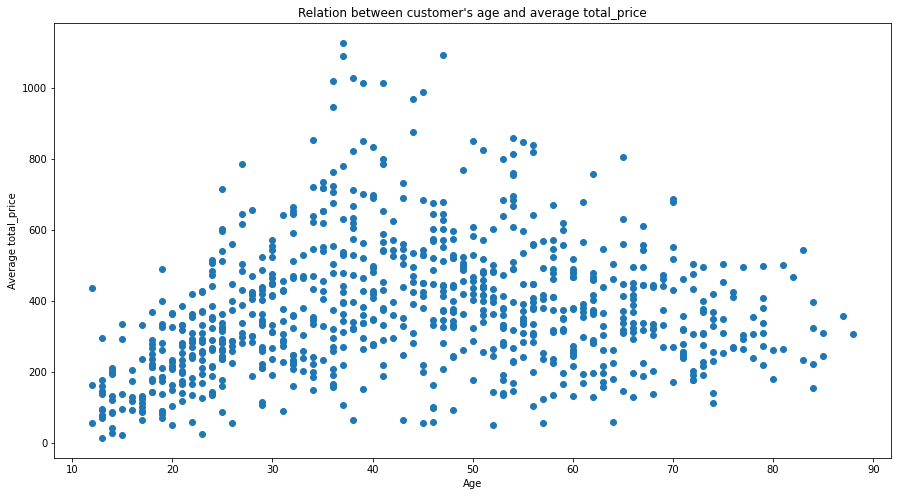

In [68]:
plt.figure(figsize=(15,8))
plt.scatter('age', 'total_price', data=purchases_c_mean)
plt.title("Relation between customer's age and average total_price")
plt.xlabel('Age')
plt.ylabel('Average total_price')

Pearson's correlation coefficient between age and total price.

In [69]:
purchases_c_mean.corr()

,total_price,age
total_price,1.000000,0.165395
age,0.165395,1.000000


We found correlation in the data present on the previous step and made some conclusions based on this data. However, we have to make sure that we can generalize our conclusion to the corresponding population. 

In [70]:
from scipy import stats
stats.pearsonr(purchases_c_mean.dropna()['total_price'], purchases_c_mean.dropna()['age'])

(0.165395081207719, 1.811078910330637e-06)

Now we are going to do the main investigation. We want to understand how special offers in our shops affect customers' behaviour. To do it, we have to identify those purchases that are made during special offers.

In [71]:
full_df_preliminary = purchases_c.join(shops.set_index(['shop_id']), on='shop_id', how='left')

In [73]:
full_df = purchases_c.reset_index().join(shops.set_index(['shop_id']), on='shop_id', how='left')

Now we need to check for each purchase, did it happen during any of the special offers or not.


In [75]:
full_df_offer = full_df.copy()
full_df_offer['offer'] = (full_df['date'] >= full_df['offer_begin']) & (full_df['date'] <= full_df['offer_end'])

Now we have a table that contains information on whether a particular purchase happened during a particular special offer. What we need is a new table that contains information on whether a particular purchase happened during *any* relevant special offer.

In [77]:
purchases_offer = full_df_offer.groupby("index").agg(
    {
        "customer_id": "first",
        "date": "first",
        "shop_id": "first",
        "total_price": "first",
        "month": "first",
        "age": "first",
        "offer": "any",
    }
)
purchases_offer

,customer_id,date,shop_id,total_price,month,age,offer
index,,,,,,,
0,0.0,2018-05-04,40,289.673291,5,38.0,False
1,0.0,2019-01-26,40,1316.898901,1,38.0,False
2,0.0,2018-11-18,42,159.414367,11,38.0,False
3,0.0,2018-05-12,42,808.791649,5,38.0,False
4,0.0,2019-04-20,42,1207.855038,4,38.0,False
...,...,...,...,...,...,...,...
28794,1212.0,2018-11-08,60,46.653544,11,24.0,False
28795,1212.0,2018-07-20,60,50.592132,7,24.0,True
28796,1212.0,2019-04-18,15,95.459705,4,24.0,False


Do people tend to spend more money when they make a purchase during a special offer? Let's check it!

In [78]:
purchases_offer_no_dec = purchases_offer[purchases_offer.month != 12]

purchases_with_offer = purchases_offer_no_dec[purchases_offer_no_dec['offer'] == True]
purchases_with_offer = purchases_with_offer.groupby('customer_id')['total_price'].mean()

purchases_no_offer = purchases_offer_no_dec[purchases_offer_no_dec['offer'] == False]
purchases_no_offer = purchases_no_offer.groupby('customer_id')['total_price'].mean()

purchases_offers = pd.merge(purchases_with_offer, purchases_no_offer, left_index=True, right_index=True, how = 'inner')

purchases_offers

,total_price_x,total_price_y
customer_id,,
0.0,901.935686,685.331168
2.0,318.049544,389.216152
3.0,551.356873,311.611398
4.0,325.092632,347.161530
5.0,279.079141,487.628759
...,...,...
1206.0,245.374937,240.058252
1207.0,941.025534,413.785779
1208.0,683.695119,542.108836


In [79]:
ttest_rel(purchases_offers['total_price_x'], purchases_offers['total_price_y'])

Ttest_relResult(statistic=16.682645056499567, pvalue=3.221672499502215e-53)